<a href="https://colab.research.google.com/github/lucasmoreiradev/portfolio-robos-b3/blob/main/Correlacao_e_curva_capital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Todos os robôs possuem um capital inicial de R$ 10.000,00. O período analisado é de toda a história disponibilizada no MetaTrader 5. O intuito é gerar um portfólio com uma curva suavizada de capital, através da diversificação.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

%matplotlib inline

df_bandas = pd.read_csv('https://raw.githubusercontent.com/lucasmoreiradev/portfolio-robos-b3/main/bandas.csv', encoding = "ISO-8859-1", sep=';')

df_bandas['Data'] = pd.to_datetime(df_bandas['<DATE>']).dt.normalize()
df_bandas = df_bandas.drop(columns=['<DATE>', '<EQUITY>', '<DEPOSIT LOAD>'])
df_bandas = df_bandas[['Data', '<BALANCE>']]
df_bandas.columns = ['Data', 'Saldo']
df_bandas = df_bandas.groupby('Data', as_index = False).last()
df_bandas.head()


,Data,Saldo
0,2015-08-15,10000.0
1,2015-08-17,9946.0
2,2015-08-18,10139.0
3,2015-08-19,10027.0
4,2015-08-20,10075.0


In [5]:

df_ifr = pd.read_csv('https://raw.githubusercontent.com/lucasmoreiradev/portfolio-robos-b3/main/ifr.csv', encoding = "ISO-8859-1", sep=';')
df_ifr['Data'] = pd.to_datetime(df_ifr['<DATE>']).dt.normalize()
df_ifr = df_ifr.drop(columns=['<DATE>', '<EQUITY>', '<DEPOSIT LOAD>'])
df_ifr = df_ifr[['Data', '<BALANCE>']]
df_ifr.columns = ['Data', 'Saldo']
df_ifr = df_ifr.groupby('Data', as_index = False).last()
df_ifr.head()

,Data,Saldo
0,2015-08-15,10000.0
1,2015-08-17,9988.0
2,2015-08-18,10325.0
3,2015-08-19,10254.0
4,2015-08-20,10358.0


In [6]:
df_rompimentox = pd.read_csv('https://raw.githubusercontent.com/lucasmoreiradev/portfolio-robos-b3/main/rompimentox.csv', encoding = "ISO-8859-1", sep=';')
df_rompimentox['Data'] = pd.to_datetime(df_rompimentox['<DATE>']).dt.normalize()
df_rompimentox = df_rompimentox.drop(columns=['<DATE>', '<EQUITY>', '<DEPOSIT LOAD>'])
df_rompimentox = df_rompimentox[['Data', '<BALANCE>']]
df_rompimentox.columns = ['Data', 'Saldo']
df_rompimentox = df_rompimentox.groupby('Data', as_index = False).last()
df_rompimentox.head()

,Data,Saldo
0,2015-08-15,10000.0
1,2015-08-17,10054.0
2,2015-08-18,10348.0
3,2015-08-19,10170.0
4,2015-08-20,10255.0


In [7]:
df_mmv2 = pd.read_csv('https://raw.githubusercontent.com/lucasmoreiradev/portfolio-robos-b3/main/mmv2.csv', encoding = "ISO-8859-1", sep=';')
df_mmv2['Data'] = pd.to_datetime(df_mmv2['<DATE>']).dt.normalize()
df_mmv2 = df_mmv2.drop(columns=['<DATE>', '<EQUITY>', '<DEPOSIT LOAD>'])
df_mmv2 = df_mmv2[['Data', '<BALANCE>']]
df_mmv2.columns = ['Data', 'Saldo']
df_mmv2 = df_mmv2.groupby('Data', as_index = False).last()
df_mmv2.head()

,Data,Saldo
0,2015-08-15,10000.0
1,2015-08-18,9926.0
2,2015-08-19,10062.0
3,2015-08-20,10066.0
4,2015-08-21,10175.0


### Curva de capital da estratégia de bandas

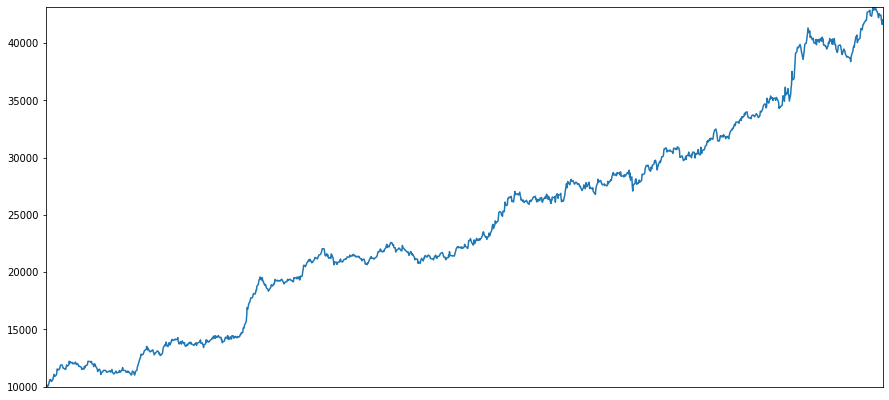

In [8]:
plt.figure(figsize=(15,7))
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_bandas['Data'], df_bandas['Saldo'] )
plt.show();

### Curva de capital de estratégia IFR

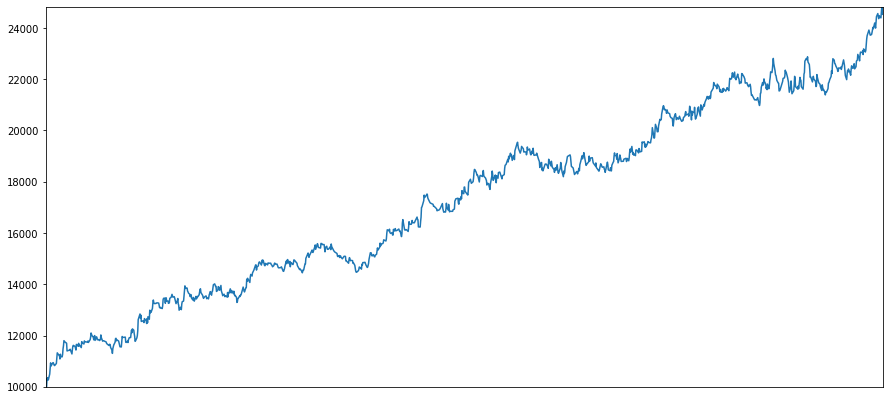

In [9]:
plt.figure(figsize=(15,7))
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_ifr['Data'], df_ifr['Saldo'] )
plt.show();

### Curva de capital da estratégia rompimentox (curva acentuada na crise de 2020)

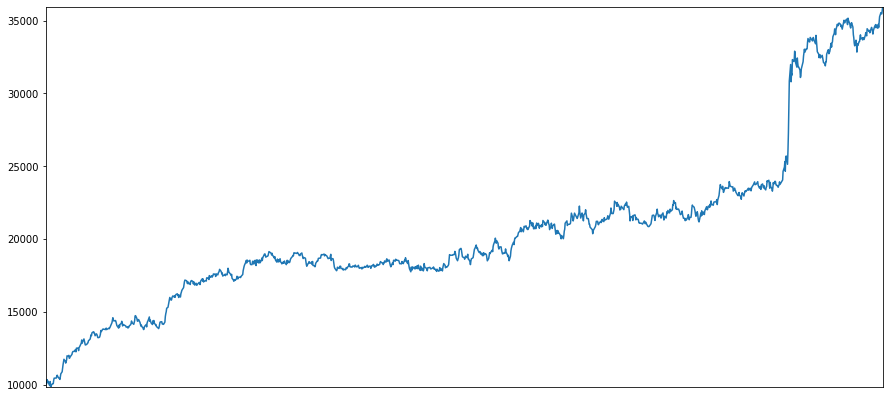

In [10]:
plt.figure(figsize=(15,7))
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_rompimentox['Data'], df_rompimentox['Saldo'] )
plt.show();

### Curva de capital da estratégia mmv2 (também teve uma curva acentuada na crise de 2020)

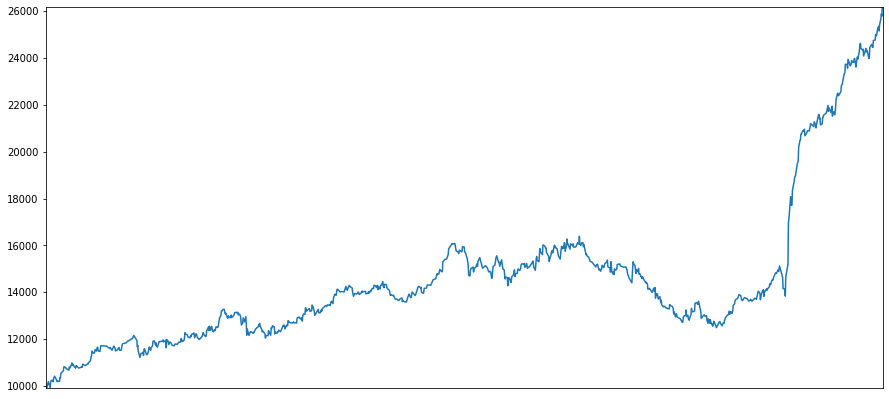

In [11]:
plt.figure(figsize=(15,7))
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_mmv2['Data'], df_mmv2['Saldo'] )
plt.show();


Obtendo dados estatísticos
Aqui é criada mais 2 colunas "Dif" e "Result". Em Dif é armazenada a variação diária, sem acumular o valor para o dia seguinte, simplesmente o resultado financeiro do dia. Result é uma coluna categórica: "1" para dia com saldo positivo e "0" para dia negativo.

Em seguida é calculado métricas importantes da estratégia: Dias positivos, dias negativos, taxa de acerto, drawdown absoluto e drawdown relativo ao capital acumulado.

In [12]:
data = [] 
result = []
topo = 5000
dd = 0
dd_rel = 0

data.append(0)
for i in range(len(df_bandas)) : 
  dif = 0
  if (i != 0) :
    dif = df_bandas.loc[i, 'Saldo'] - df_bandas.loc[i-1, 'Saldo']
    data.append(dif)
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_bandas.loc[i, 'Saldo'] > topo) :
    topo = df_bandas.loc[i, 'Saldo']
  if ((df_bandas.loc[i, 'Saldo'] - topo) < dd ) :
    dd = (df_bandas.loc[i, 'Saldo'] - topo)
    dd_rel = (dd * 100) / topo

df_bandas['Dif'] = data
df_bandas['Result'] = result
df_bandas.head()


,Data,Saldo,Dif,Result
0,2015-08-15,10000.0,0.0,0
1,2015-08-17,9946.0,-54.0,0
2,2015-08-18,10139.0,193.0,1
3,2015-08-19,10027.0,-112.0,0
4,2015-08-20,10075.0,48.0,1


In [13]:
print("Dias Positivos: "+ str(Counter(df_bandas['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_bandas['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_bandas['Result'])[1] * 100) / (Counter(df_bandas['Result'])[0] + Counter(df_bandas['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 714
Dias Negativos: 561
Taxa de Acerto: 56.00%
Drawdown Máximo: -2939.0
Drawdown Relativo: -7.12%


In [14]:
data = [] 
result = []
topo = 5000
dd = 0
dd_rel = 0

data.append(0)
for i in range(len(df_ifr)) : 
  dif = 0
  if (i != 0) :
    dif = df_ifr.loc[i, 'Saldo'] - df_ifr.loc[i-1, 'Saldo']
    data.append(dif)
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_ifr.loc[i, 'Saldo'] > topo) :
    topo = df_ifr.loc[i, 'Saldo']
  if ((df_ifr.loc[i, 'Saldo'] - topo) < dd ) :
    dd = (df_ifr.loc[i, 'Saldo'] - topo)
    dd_rel = (dd * 100) / topo

df_ifr['Dif'] = data
df_ifr['Result'] = result
df_ifr.head()


,Data,Saldo,Dif,Result
0,2015-08-15,10000.0,0.0,0
1,2015-08-17,9988.0,-12.0,0
2,2015-08-18,10325.0,337.0,1
3,2015-08-19,10254.0,-71.0,0
4,2015-08-20,10358.0,104.0,1


In [15]:
print("Dias Positivos: "+ str(Counter(df_ifr['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_ifr['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_ifr['Result'])[1] * 100) / (Counter(df_ifr['Result'])[0] + Counter(df_ifr['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 561
Dias Negativos: 548
Taxa de Acerto: 50.59%
Drawdown Máximo: -1486.0
Drawdown Relativo: -6.50%


In [16]:
data = [] 
result = []
topo = 5000
dd = 0
dd_rel = 0

data.append(0)
for i in range(len(df_rompimentox)) : 
  dif = 0
  if (i != 0) :
    dif = df_rompimentox.loc[i, 'Saldo'] - df_rompimentox.loc[i-1, 'Saldo']
    data.append(dif)
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_rompimentox.loc[i, 'Saldo'] > topo) :
    topo = df_rompimentox.loc[i, 'Saldo']
  if ((df_rompimentox.loc[i, 'Saldo'] - topo) < dd ) :
    dd = (df_rompimentox.loc[i, 'Saldo'] - topo)
    dd_rel = (dd * 100) / topo

df_rompimentox['Dif'] = data
df_rompimentox['Result'] = result
df_rompimentox.head()


,Data,Saldo,Dif,Result
0,2015-08-15,10000.0,0.0,0
1,2015-08-17,10054.0,54.0,1
2,2015-08-18,10348.0,294.0,1
3,2015-08-19,10170.0,-178.0,0
4,2015-08-20,10255.0,85.0,1


In [17]:
print("Dias Positivos: "+ str(Counter(df_rompimentox['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_rompimentox['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_rompimentox['Result'])[1] * 100) / (Counter(df_rompimentox['Result'])[0] + Counter(df_rompimentox['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 626
Dias Negativos: 621
Taxa de Acerto: 50.20%
Drawdown Máximo: -2329.0
Drawdown Relativo: -6.62%


In [18]:
data = [] 
result = []
topo = 5000
dd = 0
dd_rel = 0

data.append(0)
for i in range(len(df_mmv2)) : 
  dif = 0
  if (i != 0) :
    dif = df_mmv2.loc[i, 'Saldo'] - df_mmv2.loc[i-1, 'Saldo']
    data.append(dif)
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_mmv2.loc[i, 'Saldo'] > topo) :
    topo = df_mmv2.loc[i, 'Saldo']
  if ((df_mmv2.loc[i, 'Saldo'] - topo) < dd ) :
    dd = (df_mmv2.loc[i, 'Saldo'] - topo)
    dd_rel = (dd * 100) / topo

df_mmv2['Dif'] = data
df_mmv2['Result'] = result
df_mmv2.head()

,Data,Saldo,Dif,Result
0,2015-08-15,10000.0,0.0,0
1,2015-08-18,9926.0,-74.0,0
2,2015-08-19,10062.0,136.0,1
3,2015-08-20,10066.0,4.0,1
4,2015-08-21,10175.0,109.0,1


In [19]:
print("Dias Positivos: "+ str(Counter(df_mmv2['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_mmv2['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_mmv2['Result'])[1] * 100) / (Counter(df_mmv2['Result'])[0] + Counter(df_mmv2['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 500
Dias Negativos: 418
Taxa de Acerto: 54.47%
Drawdown Máximo: -3901.0
Drawdown Relativo: -23.81%


In [26]:

data = [] 
balances = []

df_portfolio = pd.DataFrame()

for i in range(918) : 
  data.append(df_bandas.loc[i, "Data"])
  balances.append((df_bandas.loc[i, "Saldo"] + df_ifr.loc[i, "Saldo"] + df_mmv2.loc[i, "Saldo"] + df_rompimentox.loc[i, "Saldo"]) - 40000)

dados = {'Data': data, 'Total': balances} 
  
df_portfolio = pd.DataFrame(dados) 
df_portfolio.head()

,Data,Total
0,2015-08-15,0.0
1,2015-08-17,-86.0
2,2015-08-18,874.0
3,2015-08-19,517.0
4,2015-08-20,863.0


In [27]:
topo = 0
dd = 0
dd_rel = 0
result = []

for i in range(len(df_portfolio)) : 
  dif = 0
  if (i != 0) :
    dif = df_portfolio.loc[i, 'Total'] - df_portfolio.loc[i-1, 'Total']
  if (dif > 0) :
    result.append(1)
  else : 
    result.append(0)
  if (df_portfolio.loc[i, 'Total'] > topo) :
    topo = df_portfolio.loc[i, 'Total']
  if ((df_portfolio.loc[i, 'Total'] - topo) < dd ) :
    dd = (df_portfolio.loc[i, 'Total'] - topo)
    dd_rel = (dd * 100) / (topo+15000)

df_portfolio['Result'] = result

df_portfolio.head()

,Data,Total,Result
0,2015-08-15,0.0,0
1,2015-08-17,-86.0,0
2,2015-08-18,874.0,1
3,2015-08-19,517.0,0
4,2015-08-20,863.0,1


In [28]:

print("Dias Positivos: "+ str(Counter(df_portfolio['Result'])[1]))
print("Dias Negativos: "+ str(Counter(df_portfolio['Result'])[0]))
print("Taxa de Acerto: "+('{:.2f}'.format((Counter(df_portfolio['Result'])[1] * 100) / (Counter(df_portfolio['Result'])[0] + Counter(df_portfolio['Result'])[1]) )+"%"))
print("Drawdown Máximo: "+str(dd))
print("Drawdown Relativo: "+('{:.2f}'.format(dd_rel))+"%")

Dias Positivos: 526
Dias Negativos: 392
Taxa de Acerto: 57.30%
Drawdown Máximo: -2115.0
Drawdown Relativo: -4.16%


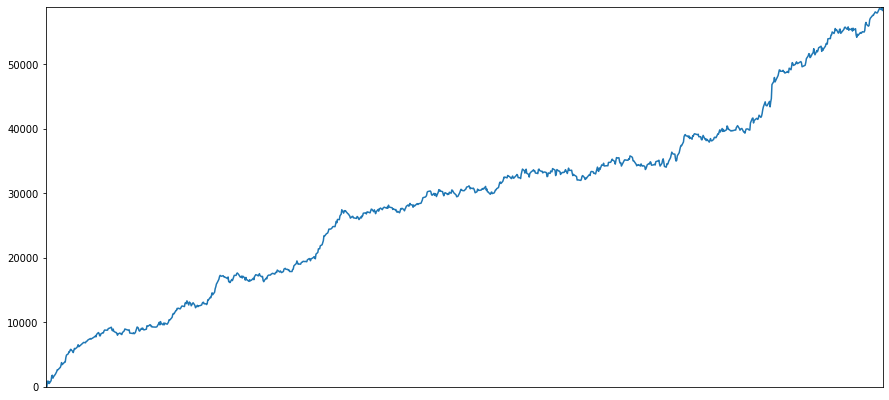

In [29]:
plt.figure(figsize=(15,7))
plt.xticks([])
plt.autoscale(tight=True)
plt.plot(df_portfolio['Data'], df_portfolio['Total'] )
plt.show();

### Análise de correlação entre as estratégias

In [24]:
dfCorrel = pd.DataFrame(index=df_portfolio.index)  
dfCorrel['BANDAS'] = df_bandas['Dif']  
dfCorrel['Rompimento X'] = df_rompimentox.loc[:,'Dif']  
dfCorrel['MMV 2'] = df_mmv2.loc[:,'Dif']  
dfCorrel['IFR'] = df_ifr.loc[:,'Dif']  

dfCorrel.head()

,BANDAS,Rompimento X,MMV 2,IFR
0,0.0,0.0,0.0,0.0
1,-54.0,54.0,-74.0,-12.0
2,193.0,294.0,136.0,337.0
3,-112.0,-178.0,4.0,-71.0
4,48.0,85.0,109.0,104.0


In [25]:
corr = dfCorrel.corr()
corr.style.background_gradient(cmap='coolwarm')

,BANDAS,Rompimento X,MMV 2,IFR
BANDAS,1.000000,-0.047012,-0.032027,-0.000005
Rompimento X,-0.047012,1.000000,0.006334,0.061487
MMV 2,-0.032027,0.006334,1.000000,0.014765
IFR,-0.000005,0.061487,0.014765,1.000000
